In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Leviathan.csv')

In [3]:
df.dtypes

name              object
review            object
reviewer_stats    object
ratings_given     object
review_like       object
dtype: object

In [13]:
df.columns

Index(['name', 'review', 'reviewer_stats', 'ratings_given', 'review_like'], dtype='object')

# Drop rows which dont have any reviews

In [20]:
df.isnull().sum()

name              0
review            9
reviewer_stats    0
ratings_given     0
review_like       0
dtype: int64

In [3]:
df[df['review'].notna()]

,name,review,reviewer_stats,ratings_given,review_like
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...","9,569 reviews\n56k followers",Rating 4 out of 5,165 likes
1,Yasiru,Since some reviewers here seem to rate this wo...,197 reviews\n115 followers,Rating 5 out of 5,138 likes\n4 comments
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...","2,412 reviews\n1 follower",Rating 5 out of 5,50 likes\n4 comments
3,E. G.,Preface\nA Scheme of Reference\nIntroduction\n...,"1,101 reviews\n662 followers",Rating 4 out of 5,41 likes\n2 comments
4,امیر لطیفی,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,155 reviews\n156 followers,Rating 3 out of 5,31 likes
...,...,...,...,...,...
763,AbsurdThoughts,only the first third,2 reviews,None,None
764,Ollie,wasn't hobbes a knob,95 reviews\n1 follower,None,None
765,Malica,Very interesting and thought provoking at time...,151 reviews\n2 followers,Rating 3 out of 5,None
766,Rebecca Crunden,"Ah, Hobbes.",Author \n14 books\n345 followers,None,None


In [4]:
df[df['review'].isnull()]

,name,review,reviewer_stats,ratings_given,review_like
44,Dina,NaN,53 reviews,Rating 3 out of 5,4 likes
110,Radka Klusáčková,NaN,8 reviews,Rating 4 out of 5,1 like
168,drdy,NaN,122 reviews\n17 followers,Rating 2 out of 5,1 like
202,Garth,NaN,193 reviews\n1 follower,Rating 5 out of 5,None
226,Orlando Fernando,NaN,120 reviews,Rating 5 out of 5,None
242,Jens,NaN,2 reviews,Rating 5 out of 5,None
319,Jaakko,NaN,2 reviews,Rating 2 out of 5,None
407,Jazmín,NaN,201 reviews\n32 followers,None,None
508,James Schrady,NaN,10 reviews,Rating 4 out of 5,None


In [5]:
df=df[df['review'].notna()]

In [50]:
df.isnull().sum()

name              0
review            0
reviewer_stats    0
ratings_given     0
review_like       0
dtype: int64

In [78]:
df['name']=df['name'].astype('str')

In [87]:
df=df.head(10)

# Check the amounth of reviews given by reviewer

In [7]:
df['reviewer_stats'].str.split(pat='reviews').str[0]

0                                9,569 
1                                  197 
2                                2,412 
3                                1,101 
4                                  155 
                     ...               
763                                  2 
764                                 95 
765                                151 
766    Author \n14 books\n345 followers
767                            1 review
Name: reviewer_stats, Length: 768, dtype: object

In [103]:
df['user_reviews_amount']=df['reviewer_stats'].str.split(pat='reviews').str[0]

In [104]:
df

,name,review,reviewer_stats,ratings_given,review_like,user_reviews_amount
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...","9,569 reviews\n56k followers",Rating 4 out of 5,165 likes,"9,569"
1,Yasiru,Since some reviewers here seem to rate this wo...,197 reviews\n115 followers,Rating 5 out of 5,138 likes\n4 comments,197
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...","2,412 reviews\n1 follower",Rating 5 out of 5,50 likes\n4 comments,"2,412"
3,E. G.,Preface\nA Scheme of Reference\nIntroduction\n...,"1,101 reviews\n662 followers",Rating 4 out of 5,41 likes\n2 comments,"1,101"
4,امیر لطیفی,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,155 reviews\n156 followers,Rating 3 out of 5,31 likes,155
...,...,...,...,...,...,...
763,AbsurdThoughts,only the first third,2 reviews,None,None,2
764,Ollie,wasn't hobbes a knob,95 reviews\n1 follower,None,None,95
765,Malica,Very interesting and thought provoking at time...,151 reviews\n2 followers,Rating 3 out of 5,None,151
766,Rebecca Crunden,"Ah, Hobbes.",Author \n14 books\n345 followers,None,None,Author \n14 books\n345 followers


In [106]:
df=df.tail(5)

# Check if the reviewer is an author or not

In [3]:
df['author']=df['reviewer_stats'].str.startswith('Author')

In [4]:
df['author'].value_counts()

False    725
True      43
Name: author, dtype: int64

In [5]:
df.tail(5)

,name,review,reviewer_stats,ratings_given,review_like,author
763,AbsurdThoughts,only the first third,2 reviews,None,None,False
764,Ollie,wasn't hobbes a knob,95 reviews\n1 follower,None,None,False
765,Malica,Very interesting and thought provoking at time...,151 reviews\n2 followers,Rating 3 out of 5,None,False
766,Rebecca Crunden,"Ah, Hobbes.",Author \n14 books\n345 followers,None,None,True
767,Kakada Yeun,I WAN TO KNOW HOW IT WORK?,1 review,None,None,False


# Preprocessing authors review

In [4]:
df_author=df[df['reviewer_stats'].str.startswith('Author')==True]
df_author

,name,review,reviewer_stats,ratings_given,review_like,author
10,Mahnam,«فراغت مادر فلسفه است و دولت مادر صلح و فراغت....,Author \n15 books\n271 followers,Rating 2 out of 5,20 likes,True
17,Steven Peterson,Three essential hallmarks of the Hobbesian sys...,Author \n21 books\n263 followers,Rating 5 out of 5,11 likes,True
22,Λευτέρης Πετρής,"""Οι πράξεις των ανθρώπων πηγάζουν από τις απόψ...",Author \n1 book\n31 followers,Rating 4 out of 5,10 likes\n2 comments,True
34,Mary Slowik,Not the best book I've ever chosen to read whi...,Author \n1 book\n20 followers,Rating 2 out of 5,6 likes,True
70,Anderson Paz,A obra Leviatã de Hobbes foi publicada em 1651...,Author \n3 books\n10 followers,Rating 3 out of 5,2 likes,True
93,Cristina Sburlea,I first read it in high school and it was the ...,Author \n8 books\n61 followers,Rating 5 out of 5,2 likes,True
118,Gordan Karlic,It was hard decision give this book rate 5 sta...,Author \n1 book\n7 followers,Rating 5 out of 5,1 like,True
142,Shem Doupé,Kinda difficult to read because of the way and...,Author \n1 book\n1 follower,Rating 3 out of 5,1 like,True
145,Willy Schuyesmans,Boeiende filosofische visie op de mens en op d...,Author \n21 books\n46 followers,Rating 4 out of 5,1 like,True
159,John Wiswell,Fascism is treated more like a dirty word than...,Author \n39 books\n352 followers,Rating 3 out of 5,1 like\n1 comment,True


# Processing author column data type

In [7]:
df_author['reviewer_stats']

10     Author \n15 books\n271 followers
17     Author \n21 books\n263 followers
22        Author \n1 book\n31 followers
34        Author \n1 book\n20 followers
70       Author \n3 books\n10 followers
93       Author \n8 books\n61 followers
118        Author \n1 book\n7 followers
142         Author \n1 book\n1 follower
145     Author \n21 books\n46 followers
159    Author \n39 books\n352 followers
176      Author \n2 books\n16 followers
198     Author \n24 books\n28 followers
201      Author \n2 books\n11 followers
204      Author \n4 books\n97 followers
213      Author \n3 books\n22 followers
225      Author \n5 books\n21 followers
237      Author \n6 books\n11 followers
247       Author \n1 book\n17 followers
285    Author \n63 books\n257 followers
305       Author \n18 books\n1 follower
370        Author \n1 book\n5 followers
417       Author \n1 book\n24 followers
421    Author \n11 books\n124 followers
504      Author \n19 books\n8 followers
519     Author \n4 books\n552 followers


#### get amount of books written 

In [ ]:
df_author['reviewer_stats'].str.split(pat='Author').str[1]

10      \n15 books\n271 followers
17      \n21 books\n263 followers
22         \n1 book\n31 followers
34         \n1 book\n20 followers
70        \n3 books\n10 followers
93        \n8 books\n61 followers
118         \n1 book\n7 followers
142          \n1 book\n1 follower
145      \n21 books\n46 followers
159     \n39 books\n352 followers
176       \n2 books\n16 followers
198      \n24 books\n28 followers
201       \n2 books\n11 followers
204       \n4 books\n97 followers
213       \n3 books\n22 followers
225       \n5 books\n21 followers
237       \n6 books\n11 followers
247        \n1 book\n17 followers
285     \n63 books\n257 followers
305        \n18 books\n1 follower
370         \n1 book\n5 followers
417        \n1 book\n24 followers
421     \n11 books\n124 followers
504       \n19 books\n8 followers
519      \n4 books\n552 followers
521     \n13 books\n557 followers
526     \n12 books\n620 followers
532      \n2 books\n101 followers
535       \n28 books\n2 followers
567       \n3 

#### amount of books they have written?

In [163]:
df_author['reviewer_stats'].str.split(pat='Author').str[1].str.split('book').str[0]

10      \n15 
17      \n21 
22       \n1 
34       \n1 
70       \n3 
93       \n8 
118      \n1 
142      \n1 
145     \n21 
159     \n39 
176      \n2 
198     \n24 
201      \n2 
204      \n4 
213      \n3 
225      \n5 
237      \n6 
247      \n1 
285     \n63 
305     \n18 
370      \n1 
417      \n1 
421     \n11 
504     \n19 
519      \n4 
521     \n13 
526     \n12 
532      \n2 
535     \n28 
567      \n3 
589      \n1 
595      \n1 
607     \n20 
612     \n56 
651      \n6 
653     \n10 
661      \n8 
699      \n1 
714      \n3 
719      \n1 
724      \n5 
740      \n5 
766     \n14 
Name: reviewer_stats, dtype: object

#### get amount of followers

In [58]:
df_author['reviewer_stats'].str.split(pat='Author').str[1].str.split('books').str[1].str.split().str[0]

10     271
17     263
22     NaN
34     NaN
70      10
93      61
118    NaN
142    NaN
145     46
159    352
176     16
198     28
201     11
204     97
213     22
225     21
237     11
247    NaN
285    257
305      1
370    NaN
417    NaN
421    124
504      8
519    552
521    557
526    620
532    101
535      2
567     21
589    NaN
595    NaN
607    222
612     17
651     24
653    123
661     75
699    NaN
714      7
719    NaN
724    NaN
740     95
766    345
Name: reviewer_stats, dtype: object

In [18]:
df['reviewer_stats'].apply(lambda author:True if author.startswith('Author') else False)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766     True
767    False
Name: reviewer_stats, Length: 768, dtype: bool

In [8]:
def get_num_author_books(author):
    num_author_books=author.split('Author')[1].split('book')[0]
    return num_author_books

In [9]:
df['num_author_books']=df['reviewer_stats'].apply(lambda author: get_num_author_books(author) if author.lower().startswith('author') else None)

In [10]:
def get_num_author_followers(author):
    author=author.replace('followers','follower')
    
    if 'books' in author:
        num_author_followers=author.split('books')[-1].replace('follower','')
    elif 'book':
        num_author_followers=author.split('book')[-1].replace('follower','')

   
    return num_author_followers

In [11]:
df['num_author_followers']=df['reviewer_stats'].apply(lambda author:get_num_author_followers(author) if author.lower().startswith('author') else None)

### Preprocessing non author stats

In [5]:
def get_num_reviewer_reviews(reviewer):
    reviews=reviewer.lower()
    reviews=reviewer.replace('reviews','review')
    
    
    reviews=reviewer.split()[0]
    
    
    return reviews
    

In [6]:
def get_num_reviewer_followers(reviewer):
    
    if 'follower' in reviewer:
        followers=reviewer.split()[-2]
    elif 'followers' in reviewer:
        followers=reviewer.split()[-2]
    else:
        followers=None
 
    return followers
    

In [7]:
df['reviewer_reviews']=df['reviewer_stats'].apply(lambda reviewer:get_num_reviewer_reviews(reviewer) if not(reviewer.lower().startswith('author')) else None)

In [8]:
df['reviewer_followers']=df['reviewer_stats'].apply(lambda reviewer:get_num_reviewer_followers(reviewer) if not(reviewer.lower().startswith('author')) else None)

In [9]:
df[['reviewer_followers','reviewer_stats']].head(30)

,reviewer_followers,reviewer_stats
0,56k,"9,569 reviews\n56k followers"
1,115,197 reviews\n115 followers
2,1,"2,412 reviews\n1 follower"
3,662,"1,101 reviews\n662 followers"
4,156,155 reviews\n156 followers
5,295,"1,756 reviews\n295 followers"
6,124,393 reviews\n124 followers
7,49,140 reviews\n49 followers
8,542,132 reviews\n542 followers
9,2,70 reviews\n2 followers


#### Multiple reviewer with thousands of followers


In [30]:
def multiply_followers(follower):
    

    if follower is None:
        pass
    elif 'k' in follower:
        follower=float(follower.strip('k'))
        follower=follower*1000
    else:
        follower=follower
    return follower

In [33]:
df['reviewer_followers']=df['reviewer_followers'].apply(lambda follower:multiply_followers(follower))

# Cannot seem to save csv with the newly derived columns?

In [14]:
df

,name,review,reviewer_stats,ratings_given,review_like,author,num_author_books,num_author_followers,reviewer_reviews,reviewer_followers
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...","9,569 reviews\n56k followers",Rating 4 out of 5,165 likes,False,None,None,"9,569",56k
1,Yasiru,Since some reviewers here seem to rate this wo...,197 reviews\n115 followers,Rating 5 out of 5,138 likes\n4 comments,False,None,None,197,115
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...","2,412 reviews\n1 follower",Rating 5 out of 5,50 likes\n4 comments,False,None,None,"2,412",1
3,E. G.,Preface\nA Scheme of Reference\nIntroduction\n...,"1,101 reviews\n662 followers",Rating 4 out of 5,41 likes\n2 comments,False,None,None,"1,101",662
4,امیر لطیفی,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,155 reviews\n156 followers,Rating 3 out of 5,31 likes,False,None,None,155,156
...,...,...,...,...,...,...,...,...,...,...
763,AbsurdThoughts,only the first third,2 reviews,None,None,False,None,None,2,None
764,Ollie,wasn't hobbes a knob,95 reviews\n1 follower,None,None,False,None,None,95,1
765,Malica,Very interesting and thought provoking at time...,151 reviews\n2 followers,Rating 3 out of 5,None,False,None,None,151,2
766,Rebecca Crunden,"Ah, Hobbes.",Author \n14 books\n345 followers,None,None,True,\n14,\n345,None,None


# Preprocessing ratings column

In [42]:
df['ratings_given'].str.split(n=2)

0      [Rating, 4, out of 5]
1      [Rating, 5, out of 5]
2      [Rating, 5, out of 5]
3      [Rating, 4, out of 5]
4      [Rating, 3, out of 5]
               ...          
763                   [None]
764                   [None]
765    [Rating, 3, out of 5]
766                   [None]
767                   [None]
Name: ratings_given, Length: 768, dtype: object

In [17]:
def get_ratings(rating):
    rating=rating.split()[1]
    return rating

In [19]:
df['ratings_given'].apply(lambda rating:get_ratings(rating) if rating.lower().startswith('rating') else None)

0         4
1         5
2         5
3         4
4         3
       ... 
763    None
764    None
765       3
766    None
767    None
Name: ratings_given, Length: 768, dtype: object

In [54]:
df['ratings_given_out_of_5']=df['ratings_given'].apply(lambda rating:get_ratings(rating) if rating.lower().startswith('rating') else None)

# Preprocessing review comment likes/comments

- Cannot get comments from those who only has comments
- and somehow it will process also likes as comments

In [61]:
def get_review_likes(review):
    
    #Case 1:138 likes 4 comments
    #Case 2:165 likes
    #Case 3:3 comments
    #fixed
    
    #convert all reviews which has likes to like
    if 'likes' in review:
        review=review.replace('likes','like')
    else:
        pass
    
    
    review=review.split()
    if 'like' in review :
        review=review[0]
    else:
        review=None
        
    
    return review

In [62]:
df['review_likes']=df['review_like'].apply(lambda review:get_review_likes(review))

In [64]:
def get_review_comments(comment):
    
    
    
    #Case 1:138 likes 4 comments
    #Case 2:3 comments
    #Case 3:1 likes
    
    
    if 'comments' in comment:
        comment=comment.replace('comments','comment')
    else:
        pass
    
    #to handle different kind of cases
    review_len=len(comment.split())
    if review_len==4:
        comment=comment.split()[2]
    elif review_len==2 and 'comment' in comment:
        comment=comment.split()[0]
    else:
        comment=None
        
    return comment

In [68]:
df['review_comments']=df['review_like'].apply(lambda comment:get_review_comments(comment))

In [69]:
df[['review_like','review_comments']]

,review_like,review_comments
0,165 likes,None
1,138 likes\n4 comments,4
2,50 likes\n4 comments,4
3,41 likes\n2 comments,2
4,31 likes,None
...,...,...
763,None,None
764,None,None
765,None,None
766,None,None


# Classify review into language

In [44]:
pip install polyglot

  Using cached polyglot-16.7.4.tar.gz (126 kB)
Using legacy setup.py install for polyglot, since package 'wheel' is not installed.
    Running setup.py install for polyglot: started
    Running setup.py install for polyglot: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [13]:
import chardet
chardet.detect("i am from".encode('cp1251'))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [25]:
testing=b"""testing"""

chardet.detect(testing)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [30]:
from chardet.universaldetector import UniversalDetector

usock = b'hello my name is aliff nice to meet you let go me'
detector = UniversalDetector()
detector.feed(usock)

detector.close()
print(detector.result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [32]:
pip install langdetect

Using legacy setup.py install for langdetect, since package 'wheel' is not installed.
    Running setup.py install for langdetect: started
    Running setup.py install for langdetect: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


#### The perfect ez one to use

In [14]:
from langdetect import detect, DetectorFactory

In [15]:
def classify_language(review):
    
    DetectorFactory.seed = 0
    try:
        return detect(review)
    except:
        return 'None'

In [8]:
df['review'].isnull().sum()

0

In [9]:
df[df['review'].isnull()]

,name,review,reviewer_stats,ratings_given,review_like


The problem bfr was that some of the data have no reviews hence the model does not detect anything

In [17]:
df['language']=df['review'].apply(classify_language)

In [18]:
df['language'].value_counts()

en      634
es       24
pt       16
fa       12
tr       11
it        8
fr        8
ar        6
de        6
no        3
nl        3
lt        2
af        2
da        2
None      2
hr        2
ro        2
el        2
ru        1
sl        1
so        1
sw        1
cy        1
sk        1
fi        1
tl        1
sq        1
et        1
hu        1
ca        1
sv        1
cs        1
Name: language, dtype: int64

Czech lol

In [20]:
df.query('language=="None"')

,name,review,reviewer_stats,ratings_given,review_like,language
127,Yahn Wuthstrack,?,36 reviews\n1 follower,Rating 3 out of 5,1 like,None
470,itsyaboisanti,2/10\n\n🤮🤮🤮🤮🤮,71 reviews,Rating 1 out of 5,None,None


# Sentiment classifiers

In [25]:
from nltk.corpus import stopwords

stop=stopwords.words('english')

Remove stop words

In [28]:
df['review']=df['review'].apply(lambda x : ' '.join(review for review in x.split() if review not in stop)).copy()

In [30]:
df['review'][0]

"Leviathan, The Matter, Forme Power Common Wealth Ecclesiasticall Civil, Thomas Hobbes Leviathan, book written Thomas Hobbes (1588–1679) published 1651 (revised Latin edition 1668). Its name derives biblical Leviathan. The work concerns structure society legitimate government, regarded one earliest influential examples social contract theory. Leviathan ranks classic Western work statecraft comparable Machiavelli's The Prince. Written English Civil War (1642–1651), Leviathan argues social contract rule absolute sovereign. تاریخ نخستین خوانش: روز دهم ماه آگوست سال2001میلادی عنوان: لویاتان؛ نویسنده: توماس هابز؛ مترجم: حسین بشیریه؛ تهران، نشر نی، سال1380؛ در572ص؛ چاپ دوم سال1381؛ چاپ چهارم سال1385؛ چاپ ششم سال1389؛ چاپ هفتم سال1391؛ چاپ هشتم سال1392؛ چاپ نهم سال1393؛ در576ص؛ شابک9789643125578؛ موضوع: دولت از نویسندگان و فیلسوفان بریتانیا - سده17میلادی فهرست: «یاداشت مترجم (حسین بشیریه)»؛ «مقدمه به قلم سی.بی مکفرسون»؛ «برخی منابع درباره هابز»؛ «یادداشتی درباره متن کتاب لویاتان»؛ «لویاتان به

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader=SentimentIntensityAnalyzer()


In [34]:
sentiment=pd.json_normalize(df['review'].apply(lambda review:vader.polarity_scores(str(review))))

In [35]:
sentiment

,neg,neu,pos,compound
0,0.022,0.954,0.024,-0.0772
1,0.125,0.702,0.172,0.9660
2,0.201,0.582,0.216,0.7879
3,0.000,0.945,0.055,0.0258
4,0.000,1.000,0.000,0.0000
...,...,...,...,...
754,0.000,1.000,0.000,0.0000
755,0.000,1.000,0.000,0.0000
756,0.188,0.650,0.162,0.1354
757,0.000,1.000,0.000,0.0000


In [36]:
df=pd.concat([df,sentiment],axis=1)


In [59]:
df['sentiment']=df['compound'].apply(lambda x: 'positive' if x>=0.05 else ('neutral' if -0.05<x<0.05 else 'negative'))

In [61]:
df['sentiment'].value_counts()

positive    414
negative    181
neutral     173
Name: sentiment, dtype: int64

<AxesSubplot:>

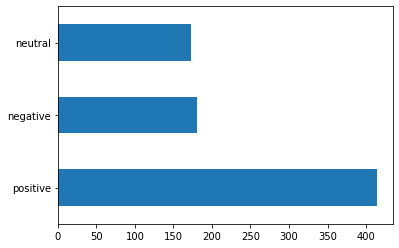

In [60]:
df['sentiment'].value_counts().plot(kind='barh')

In [58]:
df.query('sentiment=="negative"')['ratings_given']

0      Rating 4 out of 5
11     Rating 1 out of 5
17     Rating 5 out of 5
20     Rating 5 out of 5
26     Rating 4 out of 5
             ...        
763                 None
764                 None
765    Rating 3 out of 5
766                 None
767                 None
Name: ratings_given, Length: 181, dtype: object

In [56]:
df[['ratings_given','sentiment']].head(30)

,ratings_given,sentiment
0,Rating 4 out of 5,negative
1,Rating 5 out of 5,positive
2,Rating 5 out of 5,positive
3,Rating 4 out of 5,neutral
4,Rating 3 out of 5,neutral
5,Rating 4 out of 5,positive
6,Rating 4 out of 5,neutral
7,Rating 3 out of 5,positive
8,Rating 2 out of 5,positive
9,Rating 5 out of 5,neutral


# Using different types of model to classify sentiment

In [68]:
pip install -q transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [71]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
  Using cached wrapt-1.14.1-cp37-cp37m-win_amd64.whl (35 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [66]:
df['review']

0      Leviathan, The Matter, Forme Power Common Weal...
1      Since reviewers seem rate work unfairly low di...
2      Both conclusions methodology "Leviathan" shock...
3      Preface A Scheme Reference Introduction A Note...
4      هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...
                             ...                        
763                                          first third
764                                          hobbes knob
765    Very interesting thought provoking times—elusi...
766                                          Ah, Hobbes.
767                           I WAN TO KNOW HOW IT WORK?
Name: review, Length: 768, dtype: object

In [69]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

c:\users\aliff\appdata\local\programs\python\python37\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aliff\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [51]:
df.to_csv('sentiment_checking_update_20_10_2022.csv',encoding='utf-8',index=False)

# Checking final results of dataframe

In [10]:
import pandas as pd
pd.set_option("display.max_rows", 100)

In [12]:
df=pd.read_csv('clean_data.csv')

In [13]:
df['sentiment']

0      negative
1      positive
2      positive
3       neutral
4       neutral
         ...   
763    negative
764    negative
765    negative
766    negative
767    negative
Name: sentiment, Length: 768, dtype: object

In [17]:
df.query('sentiment=="negative"')['review'].head(10)[11]

'hobbes\' theory misanthropic, elitist vision humans basically corrupt, evil stupid, must lead far-sighted guardian "leviathan" enforces private property relations prevents people following "evil impulses." yikes.'

# Sentiment analysis using spacy

In [4]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

ModuleNotFoundError: No module named 'spacytextblob'

Making function to load spacy models

In [5]:
def calculate_sentiment_score(df):
    language = df['language']
    review = df['clean_review']

    if language == 'es':
        model = spacy.load('es_dep_news_trf')
        model.add_pipe('spacytextblob')
    elif language == 'pt':
        model = spacy.load('pt_core_news_lg')
        model.add_pipe('spacytextblob')
    elif language == 'it':
        model = spacy.load('it_core_news_lg')
        model.add_pipe('spacytextblob')
    elif language == 'fr':
        model = spacy.load('fr_dep_news_trf')
        model.add_pipe('spacytextblob')
    elif language == 'de':
        model = spacy.load('de_dep_news_trf')
        model.add_pipe('spacytextblob')
    else:
        model = spacy.load('en_core_web_trf')
        model.add_pipe('spacytextblob')

    doc = model(review)
    sentiment_score= doc._.blob.polarity
    sentiment_score= round(sentiment_score, 2)
    return sentiment_score


In [6]:
def classify_sentiment(score):

    if score>0:
        sentiment='positive'
    else:
        sentiment='negative'
    return sentiment


# Data conversions

In [81]:
df=pd.read_csv('clean_data_spacy_sentiment_24102022.csv')

In [82]:
df.columns

Index(['name', 'review', 'reviewer_stats', 'ratings_given', 'review_like',
       'author', 'num_author_books', 'num_author_followers',
       'reviewer_reviews', 'reviewer_followers', 'ratings_given_out_of_5',
       'review_likes', 'review_comments', 'language', 'clean_review',
       'sentiment_score', 'sentiment'],
      dtype='object')

In [83]:
df=df.drop(['reviewer_stats','ratings_given','review_like'],axis=1).copy()

In [56]:
df.head(3)

,name,review,author,num_author_books,num_author_followers,reviewer_reviews,reviewer_followers,ratings_given_out_of_5,review_likes,review_comments,language,clean_review,sentiment_score,sentiment
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...",False,NaN,NaN,"9,569",56000.0,4.0,165.0,NaN,fa,"Leviathan, The Matter, Forme Power Common Weal...",0.02,positive
1,Yasiru,Since some reviewers here seem to rate this wo...,False,NaN,NaN,197,115,5.0,138.0,4.0,en,Since reviewers seem rate work unfairly low di...,0.15,positive
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...",False,NaN,NaN,"2,412",1,5.0,50.0,4.0,en,"Both conclusions methodology ""Leviathan"" shock...",0.07,positive


In [57]:
df.dtypes

name                       object
review                     object
author                       bool
num_author_books          float64
num_author_followers      float64
reviewer_reviews           object
reviewer_followers         object
ratings_given_out_of_5    float64
review_likes              float64
review_comments           float64
language                   object
clean_review               object
sentiment_score           float64
sentiment                  object
dtype: object

## Need to convert to float:
    1. reviewer reviews
    2. reviewer followers
    

In [63]:
df['reviewer_reviews']=df['reviewer_reviews'].str.replace(',','')

Need to convert to float then to integer

In [64]:
df['reviewer_reviews']=df['reviewer_reviews'].astype(float).astype("Int64")

In [65]:
df['reviewer_reviews'].head(50)

0     9569
1      197
2     2412
3     1101
4      155
5     1756
6      393
7      140
8      132
9       70
10    <NA>
11     288
12      46
13     394
14    2659
15     659
16      48
17    <NA>
18     386
19     491
20    1405
21     730
22    <NA>
23    2332
24     919
25      26
26      46
27    2481
28    1517
29     107
30     590
31     132
32    4137
33     593
34    <NA>
35      10
36     310
37     182
38     133
39       5
40     199
41     102
42     590
43     757
44      77
45     363
46     432
47     191
48      13
49     164
Name: reviewer_reviews, dtype: Int64

#### Converting reviewer followers

In [60]:
df['reviewer_followers']=df['reviewer_followers'].str.replace(',','')

In [61]:
df['reviewer_followers']=df['reviewer_followers'].astype(float).astype("Int64")

In [84]:
df.dtypes

name                       object
review                     object
author                       bool
num_author_books          float64
num_author_followers      float64
reviewer_reviews           object
reviewer_followers         object
ratings_given_out_of_5    float64
review_likes              float64
review_comments           float64
language                   object
clean_review               object
sentiment_score           float64
sentiment                  object
dtype: object

In [79]:
df['review_comments'] = df['review_comments'].astype(float).astype("Int32")

# Data validation 1(after scraping, bfr data cleaning)

In [40]:
import pandas as pd

In [30]:
pip install pandera

  Using cached pandera-0.13.3-py3-none-any.whl (120 kB)
  Using cached typing_inspect-0.8.0-py3-none-any.whl (8.7 kB)
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\aliff\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [41]:
df=pd.read_csv('use_this_for_validation_after_data_cleaning.csv')

In [42]:
df['reviewer_reviews'] = df['reviewer_reviews'].astype(float).astype("Int32")

df['reviewer_followers'] = df['reviewer_followers'].astype(float).astype("Int32")



df['num_author_books'] = df['num_author_books'].astype(float).astype("Int32")


df['num_author_followers'] = df['num_author_followers'].astype(float).astype("Int32")

df['ratings_given_out_of_5'] = df['ratings_given_out_of_5'].astype(float).astype("Int8")


df['review_likes'] = df['review_likes'].astype(float).astype("Int32")


df['review_comments'] = df['review_comments'].astype(float).astype("Int32")

In [31]:
df.shape[1]

14

In [37]:
def check_num_columns(df):

    if df.shape[1]==14:
        pass
    else:
        return "Invalid number of columns"

In [36]:
check_num_columns(df)

suii


In [43]:
df.columns

Index(['name', 'review', 'author', 'num_author_books', 'num_author_followers',
       'reviewer_reviews', 'reviewer_followers', 'ratings_given_out_of_5',
       'review_likes', 'review_comments', 'language', 'clean_review',
       'sentiment_score', 'sentiment'],
      dtype='object')

In [45]:
df.dtypes

name                       object
review                     object
author                       bool
num_author_books            Int32
num_author_followers        Int32
reviewer_reviews            Int32
reviewer_followers          Int32
ratings_given_out_of_5       Int8
review_likes                Int32
review_comments             Int32
language                   object
clean_review               object
sentiment_score           float64
sentiment                  object
dtype: object

### Checking for all columns if it is avalaible or not

In [53]:
pa.dtypes.Int32

pandera.dtypes.Int8

In [10]:
import pandas as pd
import pandera as pa

from pandera import Column, DataFrameSchema
from pandera.errors import SchemaErrors

def required_columns_validation(df):
    try:
        schema = DataFrameSchema({
            "name": Column(object),
            "review": Column(object),
            "author": Column(bool),
            "num_author_books": Column(pa.dtypes.Int32, required=False,nullable=True),
            "num_author_followers": Column(pa.dtypes.Int32, required=False,nullable=True),
            "reviewer_reviews": Column(pa.dtypes.Int32, required=False,nullable=True),
            "reviewer_followers": Column(pa.dtypes.Int32, required=False,nullable=True),
            "ratings_given_out_of_5": Column(pa.dtypes.Int8,nullable=True),
            "review_likes": Column(pa.dtypes.Int32,required=False,nullable=True),
            "review_comments": Column(pa.dtypes.Int32,required=False,nullable=True),
            "language": Column(object),
            "clean_review": Column(object),
            "sentiment_score": Column(float),
            "sentiment": Column(object)    
        })
        validated_df = schema.validate(df)
        print(validated_df)
    except SchemaErrors as err:
            return err.failure_cases
        
        
        
required_columns_validation(df)
    
# validated_df = schema.validate(df)
# print(validated_df)

                 name                                             review  \
0    Ahmad Sharabiani  Leviathan, or The Matter, Forme and Power of a...   
1              Yasiru  Since some reviewers here seem to rate this wo...   
2         Czarny Pies  Both the conclusions and methodology of "Levia...   
3               E. G.  Preface\nA Scheme of Reference\nIntroduction\n...   
4          امیر لطیفی  هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...   
..                ...                                                ...   
754    AbsurdThoughts                               only the first third   
755             Ollie                               wasn't hobbes a knob   
756            Malica  Very interesting and thought provoking at time...   
757   Rebecca Crunden                                        Ah, Hobbes.   
758       Kakada Yeun                         I WAN TO KNOW HOW IT WORK?   

     author  num_author_books  num_author_followers  reviewer_reviews  \
0     False   

# Perform checkings for certain columns

In [15]:
df=pd.read_csv('use_this_for_validation_after_data_cleaning.csv',index_col=False)

In [4]:
df.dtypes

name                       object
review                     object
author                       bool
num_author_books          float64
num_author_followers      float64
reviewer_reviews          float64
reviewer_followers        float64
ratings_given_out_of_5    float64
review_likes              float64
review_comments           float64
language                   object
clean_review               object
sentiment_score           float64
sentiment                  object
dtype: object

In [80]:
df['reviewer_reviews'] = df['reviewer_reviews'].astype(float).astype("Int32")

df['reviewer_followers'] = df['reviewer_followers'].astype(float).astype("Int32")



df['num_author_books'] = df['num_author_books'].astype(float).astype("Int32")


df['num_author_followers'] = df['num_author_followers'].astype(float).astype("Int32")

df['ratings_given_out_of_5'] = df['ratings_given_out_of_5'].astype(float).astype("Int8")


df['review_likes'] = df['review_likes'].astype(float).astype("Int32")


df['review_comments'] = df['review_comments'].astype(float).astype("Int32")

In [81]:
df.dtypes

name                       object
review                     object
author                       bool
num_author_books            Int32
num_author_followers        Int32
reviewer_reviews            Int32
reviewer_followers          Int32
ratings_given_out_of_5       Int8
review_likes                Int32
review_comments             Int32
language                   object
clean_review               object
sentiment_score           float64
sentiment                  object
dtype: object

In [125]:
import pandera as pa
from pandera import Column, Check, DataFrameSchema

schema = DataFrameSchema({
    "num_author_books": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "num_author_followers": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "reviewer_reviews": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "reviewer_followers": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "ratings_given_out_of_5": Column(pa.dtypes.Int8, Check.in_range(0,5),nullable=True),
    "review_likes": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "reviewer_followers": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "review_comments": Column(pa.dtypes.Int32, Check.greater_than_or_equal_to(0),nullable=True),
    "sentiment_score": Column(pa.dtypes.Float64, Check.in_range(-1,1),nullable=True),    
})
schema.validate(df)

,name,review,author,num_author_books,num_author_followers,reviewer_reviews,reviewer_followers,ratings_given_out_of_5,review_likes,review_comments,language,clean_review,sentiment_score,sentiment
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...",False,<NA>,<NA>,9569,56000,4,165,<NA>,fa,"Leviathan, The Matter, Forme Power Common Weal...",0.02,positive
1,Yasiru,Since some reviewers here seem to rate this wo...,False,<NA>,<NA>,197,115,5,138,4,en,Since reviewers seem rate work unfairly low di...,0.15,positive
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...",False,<NA>,<NA>,2412,1,5,50,4,en,"Both conclusions methodology ""Leviathan"" shock...",0.07,positive
3,E. G.,Preface\nA Scheme of Reference\nIntroduction\n...,False,<NA>,<NA>,1101,662,4,41,2,en,Preface A Scheme Reference Introduction A Note...,0.00,negative
4,امیر لطیفی,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,False,<NA>,<NA>,155,156,3,31,<NA>,fa,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,0.00,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,AbsurdThoughts,only the first third,False,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>,en,first third,0.12,positive
755,Ollie,wasn't hobbes a knob,False,<NA>,<NA>,95,1,<NA>,<NA>,<NA>,en,hobbes knob,0.00,negative
756,Malica,Very interesting and thought provoking at time...,False,<NA>,<NA>,151,2,3,<NA>,<NA>,en,Very interesting thought provoking times—elusi...,0.18,positive
757,Rebecca Crunden,"Ah, Hobbes.",True,14,345,<NA>,<NA>,<NA>,<NA>,<NA>,en,"Ah, Hobbes.",0.00,negative


In [121]:
schema.validate(df)

,name,review,author,num_author_books,num_author_followers,reviewer_reviews,reviewer_followers,ratings_given_out_of_5,review_likes,review_comments,language,clean_review,sentiment_score,sentiment
0,Ahmad Sharabiani,"Leviathan, or The Matter, Forme and Power of a...",False,<NA>,<NA>,9569,56000,4,165,<NA>,fa,"Leviathan, The Matter, Forme Power Common Weal...",0.02,positive
1,Yasiru,Since some reviewers here seem to rate this wo...,False,<NA>,<NA>,197,115,5,138,4,en,Since reviewers seem rate work unfairly low di...,0.15,positive
2,Czarny Pies,"Both the conclusions and methodology of ""Levia...",False,<NA>,<NA>,2412,1,5,50,4,en,"Both conclusions methodology ""Leviathan"" shock...",0.07,positive
3,E. G.,Preface\nA Scheme of Reference\nIntroduction\n...,False,<NA>,<NA>,1101,662,4,41,2,en,Preface A Scheme Reference Introduction A Note...,0.00,negative
4,امیر لطیفی,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,False,<NA>,<NA>,155,156,3,31,<NA>,fa,هدفِ اصلی کتاب پاسخ به این پرسش است: چرا به دو...,0.00,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,AbsurdThoughts,only the first third,False,<NA>,<NA>,2,<NA>,<NA>,<NA>,<NA>,en,first third,0.12,positive
755,Ollie,wasn't hobbes a knob,False,<NA>,<NA>,95,1,<NA>,<NA>,<NA>,en,hobbes knob,0.00,negative
756,Malica,Very interesting and thought provoking at time...,False,<NA>,<NA>,151,2,3,<NA>,<NA>,en,Very interesting thought provoking times—elusi...,0.18,positive
757,Rebecca Crunden,"Ah, Hobbes.",True,14,345,<NA>,<NA>,<NA>,<NA>,<NA>,en,"Ah, Hobbes.",0.00,negative


In [70]:
df.to_csv('checking_float.csv')